In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
# def forel(X, r):
#     C = []
#     S = set(range(X.shape[0]))
#     while S:
#         point_idx = S.pop()
#         current_cluster = [point_idx]
#         distances = pairwise_distances(X[point_idx, np.newaxis], X).reshape(-1)
#         current_cluster += [i for i, dist in enumerate(distances) if dist <= r and i != point_idx and i in S]
#         C.append(current_cluster)
#         S -= set(current_cluster)
#     return C


In [4]:
data = pd.read_csv('Wholesale customers data.csv')

In [5]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [8]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [36]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

import numpy as np

def forel(data, r):
    """
    Функция, реализующая алгоритм FOREL.

    :param data: numpy-массив исходных данных
    :param r: радиус кластера
    :return: список numpy-массивов - найденные кластеры
    """
    clusters = []
    remaining_points = set(range(data.shape[0]))  # множество индексов оставшихся точек

    while remaining_points:
        idx = next(iter(remaining_points))  # выбор произвольной точки из множества оставшихся точек
        cluster = [idx]  # начало нового кластера с выбранной точки
        remaining_points.remove(idx)  # удаляем выбранную точку

        while True:
            center = np.mean(data[cluster], axis=0)  # вычисление центра кластера
            dist = np.linalg.norm(data - center, axis=1)  # вычисление расстояний до центра

            # поиск точек, которые находятся внутри заданного радиуса
            points_within_radius = np.where(dist < r)[0]
            points_within_radius = set(points_within_radius).intersection(remaining_points)

            if not points_within_radius:
                break

            cluster += list(points_within_radius)
            remaining_points = remaining_points.difference(points_within_radius)

        clusters.append(data[cluster])

    return clusters

In [19]:
from sklearn.preprocessing import StandardScaler

# Загрузка данных из csv-файла и удаление столбцов 'Channel' и 'Region'
data = pd.read_csv('Wholesale customers data.csv')
data = data.drop(['Channel', 'Region'], axis=1)

# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [41]:
clusters = forel(scaled_data, 3)

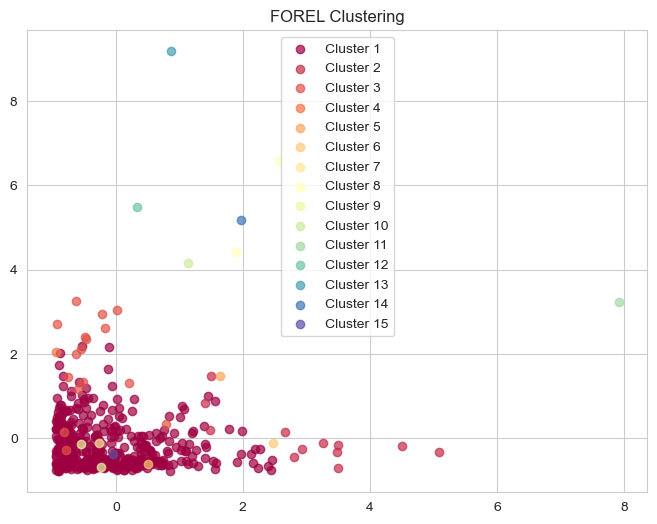

In [42]:
import matplotlib.pyplot as plt

# Определение числа кластеров
n_clusters = len(clusters)

# Генерация списка цветов для каждого кластера
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, n_clusters)]

# Построение графика
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], edgecolor=None, alpha=0.7, label='Cluster {}'.format(i+1))

# Оформление графика
ax.set_title('FOREL Clustering')
plt.legend()
plt.show()